# Term Deposit Sale


### Goal:

Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

### Deliverable – 1 (Exploratory data quality report reflecting the following):
1. Univariate analysis (12 marks)<br>
a. Univariate analysis – data types and description of the independent attributes
which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.<br>
b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.<br>
c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.<br>
2. Multivariate analysis (8 marks)<br>
a. Bi-variate analysis between the predictor variables and target column. Comment
on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.<br>
b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots<br>

### Deliverable – 2 (Prepare the data for analytics)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30


### Deliverable – 3 (create the ensemble model) 
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)
2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)


### Attribute Information:
Input variables:<br><br>
Bank client data:<br>
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account<br><br>
Related to previous contact:<br><br>
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*<br><br>
Other attributes:<br><br>
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign<br><br>
Output variable (desired target):<br><br>
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

# Import all necessary modules and load the data

In [69]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [70]:
#Load data
term = pd.read_csv("bank-full.csv")

In [71]:
term.shape # Check number of columns and rows in data frame

(45211, 17)

In [4]:
term.head(10) # To check first 10 rows of data set

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
# Check whether there are any null values in data set
term.isnull().values.any() 

False

In [24]:
term.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

**Insights:**
- `No columns have null values`

# <a id='link2'>Data Visualization and EDA</a>

##  Univariate

In [6]:
#Checking data types
print (term.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [7]:
#Statistical summary
term.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


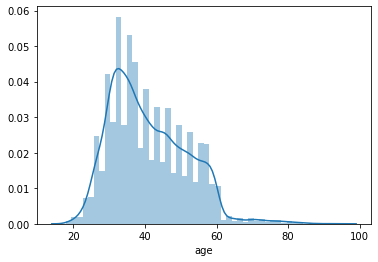

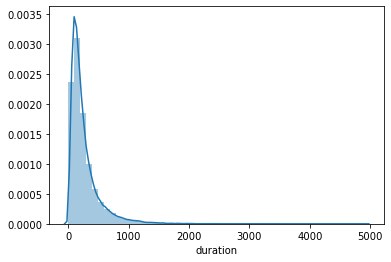

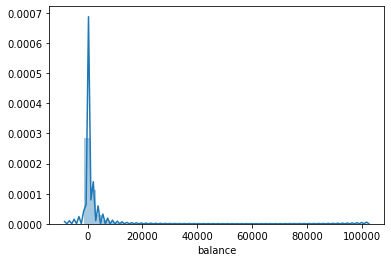

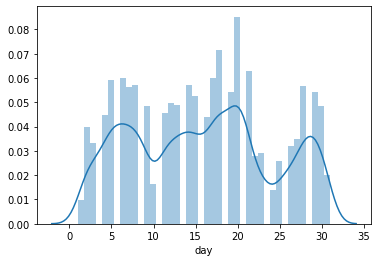

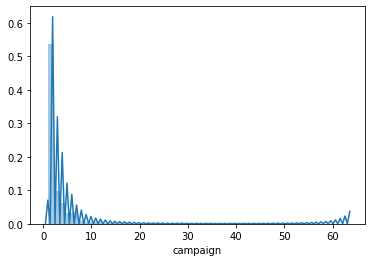

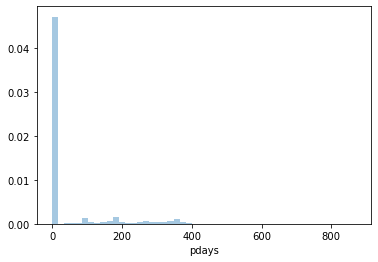

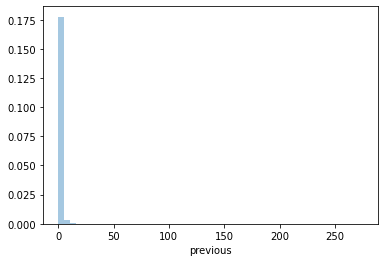

In [8]:
# distplot for continous columns
for i in ['age','duration','balance','day','campaign','pdays','previous']:
    sns.distplot(term[i])
    plt.show()

## Bivariate

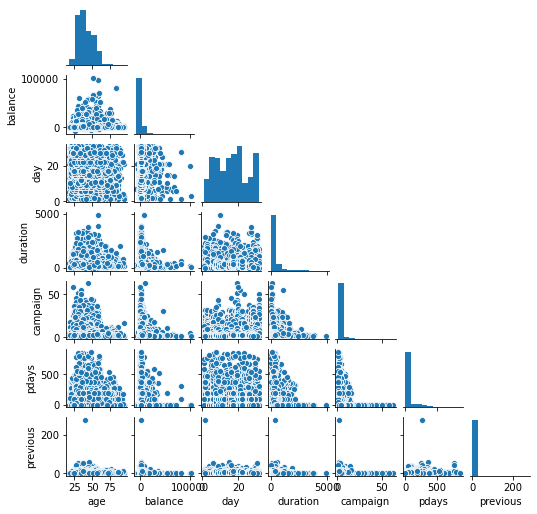

In [9]:
#Pairplot
sns.pairplot(term, height=1, diag_kind='auto', corner=True)
plt.show()

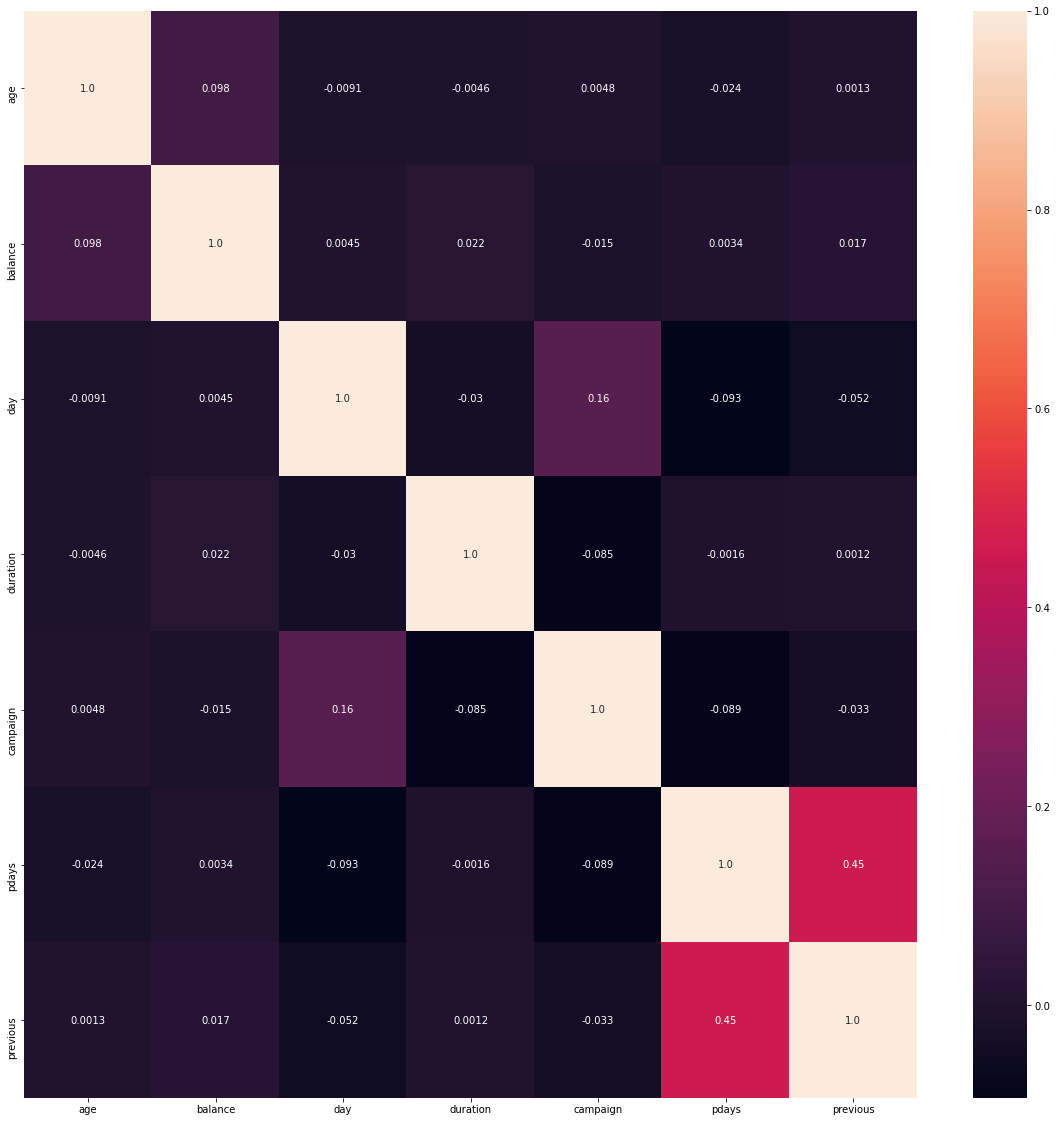

In [10]:
#Heatmap to visualize correlation
plt.figure(figsize=(20,20))
sns.heatmap(term.corr(), annot=True, fmt=".2")
plt.show()

**Insights:**
- `No columns are highly correlated`

In [11]:
# Checking the number of unique values in each column of the dataframe.
term.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [13]:
pd.crosstab(term['education'],term['Target'],normalize='columns')

Target,no,yes
education,,
primary,0.156806,0.111741
secondary,0.519814,0.463226
tertiary,0.283177,0.377387
unknown,0.040203,0.047646


**Insights:**
- `A customer with an secondary education has a slightly lower likelihood of subscribing to a term deposit. We will check how this feature influences final model using coefficients`

In [14]:
pd.crosstab(term['marital'],term['Target'],normalize='columns')

Target,no,yes
marital,,
divorced,0.114849,0.117603
married,0.612670,0.520892
single,0.272481,0.361505


**Insights:**
- `A married customer has a slightly lower likelihood of subscribing to a term deposit. We will check how this feature influences final model using coefficients`

In [20]:
for i in list(term.columns[term.dtypes=='object']):   # checking value counts of all object type columns
    print(term[i].value_counts(normalize=True))
    print()

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

no     0.981973
yes    0.018027
Name: default, dtype: float64

yes    0.555838
no     0.444162
Name: housing, dtype: float64

no     0.839774
yes    0.160226
Name: loan, dtype: float64

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar

**Insights:**
- `There are 3 major Job categories. We may consider to fold the rest into these 3 and create dummies`
- `Target has data imbalance but there is no need to treat it`

In [25]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = term['Target'].value_counts(normalize=True)
print(prop_Y)

no     0.883015
yes    0.116985
Name: Target, dtype: float64


**Insights:**
- `There is an imbalance in the data but there is no need to treat it`

In [72]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = term['Target'].value_counts(normalize=True)
print(prop_Y)

no     0.883015
yes    0.116985
Name: Target, dtype: float64


In [50]:
#Personal loan value counts
term['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

#### Convert the columns with an 'object' datatype into categorical variables

In [73]:
for feature in term.columns: # Loop through all columns in the dataframe
    if term[feature].dtype == 'object': # Only apply for columns with categorical strings
        term[feature] = pd.Categorical(term[feature])# Replace strings with an integer
term.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [74]:
print(term.job.value_counts())
print(term.education.value_counts())
print(term.default.value_counts())
print(term.balance.value_counts())
print(term.housing.value_counts())
print(term.loan.value_counts())
print(term.contact.value_counts())
print(term.day.value_counts())
print(term.month.value_counts())
print(term.duration.value_counts())
print(term.campaign.value_counts())
print(term.pdays.value_counts())
print(term.previous.value_counts())
print(term.previous.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
3

In [75]:
replaceStruct = {
                "marital":     {"married": 1, "single": 2 ,"divorced": 3},
                "education": {"secondary": 1, "tertiary":2 , "primary": 3, "unknown": 4},
                "default":     {"no": 0, "yes": 1 },
                "housing":     {"no": 0, "yes": 1 },
                "loan":     {"no": 0, "yes": 1 },
                "contact":     {"cellular": 1, "unknown": 2 ,"telephone": 3},
                "poutcome": {"unknown": 1, "failure":2 , "other": 3, "success": 4},
                "Target":     {"no": 0, "yes": 1 }
                    }
oneHotCols=["job","day","month","duration","campaign","pdays","previous"]


In [76]:
term=term.replace(replaceStruct)
term=pd.get_dummies(term, columns=oneHotCols)
term.head(10)


,age,marital,education,default,balance,housing,loan,contact,poutcome,Target,...,previous_32,previous_35,previous_37,previous_38,previous_40,previous_41,previous_51,previous_55,previous_58,previous_275
0,58,1,2,0,2143,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
1,44,2,1,0,29,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,33,1,1,0,2,1,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,47,1,4,0,1506,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,2,4,0,1,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
5,35,1,2,0,231,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
6,28,2,2,0,447,1,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
7,42,3,2,1,2,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
8,58,1,3,0,121,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
9,43,2,1,0,593,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0


## Split Data

In [77]:
## Define X and Y variables
X = term.drop("Target" , axis=1)
y = term.pop("Target")

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [106]:
#Convert categorical vriables to dummy variables
#X = pd.get_dummies(X, drop_first=True)
y_train.value_counts()

0    27909
1     3738
Name: Target, dtype: int64

In [79]:
X.head(10)

,age,marital,education,default,balance,housing,loan,contact,poutcome,job_admin.,...,previous_32,previous_35,previous_37,previous_38,previous_40,previous_41,previous_51,previous_55,previous_58,previous_275
0,58,1,2,0,2143,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
1,44,2,1,0,29,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,33,1,1,0,2,1,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,47,1,4,0,1506,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,2,4,0,1,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
5,35,1,2,0,231,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
6,28,2,2,0,447,1,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
7,42,3,2,1,2,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
8,58,1,3,0,121,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
9,43,2,1,0,593,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Columns: 2285 entries, age to previous_275
dtypes: int64(9), uint8(2276)
memory usage: 101.2 MB


## <a id = "link6"></a> Logistic Regression Model

In [149]:
from sklearn.linear_model import LogisticRegression
# Fit the model on train
lmodel = LogisticRegression(random_state=7)
lmodel.fit(X_train, y_train)
#predict on test
y_predict = lmodel.predict(X_test)


coef_df = pd.DataFrame(lmodel.coef_)
coef_df['intercept'] = lmodel.intercept_
coef_df

,0,1,2,3,4,5,6,7,8,9,...,2276,2277,2278,2279,2280,2281,2282,2283,2284,intercept
0,-0.012372,0.149981,-0.231988,-0.113842,0.000025,-0.949024,-0.683403,-0.350233,0.575147,-0.06748,...,0.0,-0.002534,-0.00156,-0.001391,-0.001076,-0.001094,0.0,0.004761,0.0,-0.710053


In [150]:
#Model score or accuracy
model_score = lmodel.score(X_test, y_test)
acc_LR = model_score
print(model_score)

0.8925833087584784


0.8925833087584784


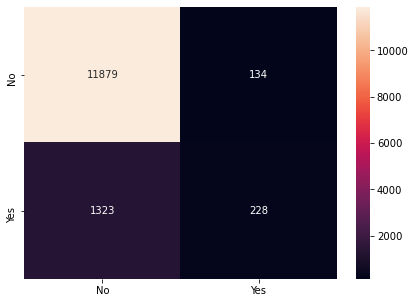

In [153]:
#Build confusion matrix
print(lmodel.score(X_test , y_test))
y_predict = lmodel.predict(X_test)
acc_LR = lmodel.score(X_test, y_test)
rec_LR = recall_score(y_test,y_predict)
pre_LR = precision_score(y_test,y_predict)
f1_LR = f1_score(y_test,y_predict)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [154]:
print("Training accuracy",lmodel.score(X_train,y_train))  
print()
print("Testing accuracy",lmodel.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()

Training accuracy 0.8888678231743925

Testing accuracy 0.8925833087584784

Recall: 0.1470019342359768

Precision: 0.6298342541436464

F1 Score: 0.2383690538421328



In [156]:
#Store the performance metrics for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': acc_LR, 'recall': rec_LR, 'precision': pre_LR, 'f1_score': f1_LR})
resultsDf = resultsDf[['Method', 'accuracy', 'recall', 'precision', 'f1_score']]
resultsDf

,Method,accuracy,recall,precision,f1_score
0,Logistic Regression,0.892583,0.147002,0.629834,0.238369


## <a id = "link6"></a> Decision Tree

#### Build model using the DecisionTreeClassifier function using default 'gini' criteria to split. 

In [157]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Scoring the Decision Tree

In [158]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8703922146859333


**Insights:**
- `Above tree has an overfitting problem. We need to reduce overfitting by regularization`

#### Reducing over fitting (Regularization)

In [159]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8929124403576958
0.8956797404895311


**Insights:**
- `Regularization eliminated overfitting and increased the accuracy by 2%.`

In [160]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
temp=pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by='Imp', ascending=False)
temp.head(20)

,Imp
poutcome,0.751025
age,0.124858
month_oct,0.084804
housing,0.019080
month_may,0.008429
duration_96,0.007437
day_21,0.004368
duration_1723,0.000000
duration_1727,0.000000
duration_1730,0.000000


**Insights:**
- `The most important features that influenced the Decision Tree model are poutcome and age.`

0.8956797404895311


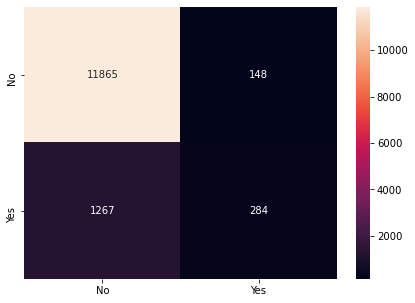

In [162]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)
acc_DT = (dTreeR.score(X_test, y_test))
rec_DT = recall_score(y_test,y_predict)
pre_DT = precision_score(y_test,y_predict)
f1_DT = f1_score(y_test,y_predict)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [163]:
print("Training accuracy",dTreeR.score(X_train,y_train))  
print()
print("Testing accuracy",dTreeR.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()

Training accuracy 0.8929124403576958

Testing accuracy 0.8956797404895311

Recall: 0.1831076724693746

Precision: 0.6574074074074074

F1 Score: 0.28643469490670703



In [164]:
#Store the performance metrics for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': [acc_DT], 'recall': rec_DT, 'precision': pre_DT, 'f1_score': f1_DT})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall', 'precision', 'f1_score']]
resultsDf

,Method,accuracy,recall,precision,f1_score
0,Logistic Regression,0.892583,0.147002,0.629834,0.238369
0,Decision Tree,0.895680,0.183108,0.657407,0.286435


**Insights:**
- `Based on the performance measurements above, the Decision Tree model performs marginally better than the Logistic Regression.`

<a id  = ensemblelearning></a>
#                             Ensemble - Bagging

#### Build model using the BaggingClassifier function using 50 estimators or trees. 

In [165]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

#### Score the model and build a confusion matrix 

0.8919197876732528


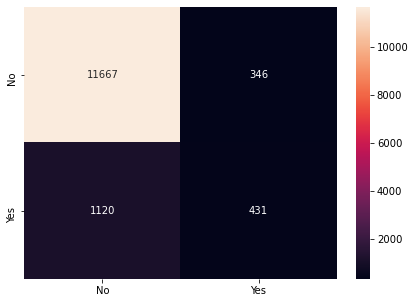

In [166]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))
acc_BG = bgcl.score(X_test, y_test)
rec_BG = recall_score(y_test,y_predict)
pre_BG = precision_score(y_test,y_predict)
f1_BG = f1_score(y_test,y_predict)

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [167]:
print("Training accuracy",bgcl.score(X_train,y_train))  
print()
print("Testing accuracy",bgcl.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()

Training accuracy 0.998578064271495

Testing accuracy 0.8919197876732528

Recall: 0.27788523533204385

Precision: 0.5546975546975547

F1 Score: 0.37027491408934704



**Insights:**
- `Based on the performance measurements above, the Ensemble Bagging model has a slightly lower accuracy and lower precision score than the Decision Tree; but  has better f1_score and recall scores. It appears to suffer from overfitting.`

In [168]:
#Store the performance metrics for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG], 'recall': rec_BG, 'precision': pre_BG, 'f1_score': f1_BG})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall', 'precision', 'f1_score']]
resultsDf

,Method,accuracy,recall,precision,f1_score
0,Logistic Regression,0.892583,0.147002,0.629834,0.238369
0,Decision Tree,0.895680,0.183108,0.657407,0.286435
0,Bagging,0.891920,0.277885,0.554698,0.370275


# Ensemble Learning - AdaBoosting

#### Build model using the AdaBoostClassifier function using 10 estimators or trees. 

In [169]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

#### Score the model and build a confusion matrix 

0.8941315246240047


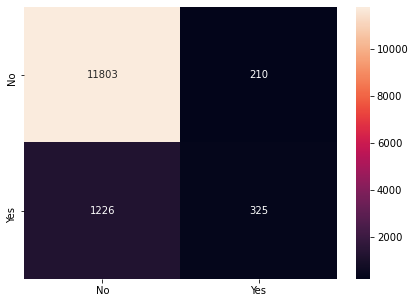

In [170]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

acc_ADA = abcl.score(X_test, y_test)
rec_ADA = recall_score(y_test,y_predict)
pre_ADA = precision_score(y_test,y_predict)
f1_ADA = f1_score(y_test,y_predict)

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [171]:
print("Training accuracy",abcl.score(X_train,y_train))  
print()
print("Testing accuracy",abcl.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()

Training accuracy 0.8907321389073214

Testing accuracy 0.8941315246240047

Recall: 0.20954223081882656

Precision: 0.6074766355140186

F1 Score: 0.311601150527325



In [172]:
#Store the performance metrics for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['AdaBoosting'], 'accuracy': [acc_ADA], 'recall': rec_ADA, 'precision': pre_ADA, 'f1_score': f1_ADA})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall', 'precision', 'f1_score']]
resultsDf

,Method,accuracy,recall,precision,f1_score
0,Logistic Regression,0.892583,0.147002,0.629834,0.238369
0,Decision Tree,0.895680,0.183108,0.657407,0.286435
0,Bagging,0.891920,0.277885,0.554698,0.370275
0,AdaBoosting,0.894132,0.209542,0.607477,0.311601


#                     Ensemble Learning - GradientBoost

#### Build model using the GradientBoostingClassifier function using 50 estimators or trees. 

In [173]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

#### Score the model and build a confusion matrix 

0.8949424948392805


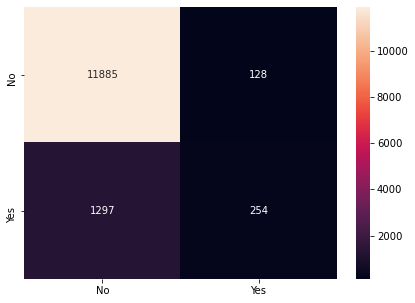

In [174]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))

acc_GB = gbcl.score(X_test, y_test)
rec_GB = recall_score(y_test,y_predict)
pre_GB = precision_score(y_test,y_predict)
f1_GB = f1_score(y_test,y_predict)

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [175]:
print("Training accuracy",gbcl.score(X_train,y_train))  
print()
print("Testing accuracy",gbcl.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()

Training accuracy 0.893891996081777

Testing accuracy 0.8949424948392805

Recall: 0.16376531270148292

Precision: 0.6649214659685864

F1 Score: 0.2628039317123642



In [176]:
#Store the performance metrics for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['GradientBoost'], 'accuracy': [acc_GB], 'recall': rec_GB, 'precision': pre_GB, 'f1_score': f1_GB})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall', 'precision', 'f1_score']]
resultsDf

,Method,accuracy,recall,precision,f1_score
0,Logistic Regression,0.892583,0.147002,0.629834,0.238369
0,Decision Tree,0.895680,0.183108,0.657407,0.286435
0,Bagging,0.891920,0.277885,0.554698,0.370275
0,AdaBoosting,0.894132,0.209542,0.607477,0.311601
0,GradientBoost,0.894942,0.163765,0.664921,0.262804


# Ensemble RandomForest Classifier

#### Build model using the RandomForestClassifier function using 50 estimators or trees. Limit the number of features to 12.

In [177]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

#### Score the model and build a confusion matrix 

0.8927307578885284


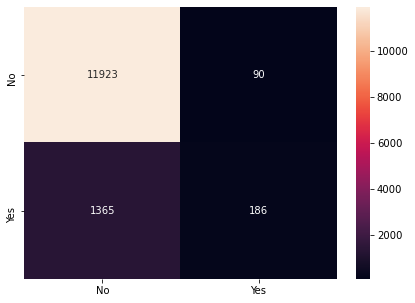

In [178]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))

acc_RF = rfcl.score(X_test, y_test)
rec_RF = recall_score(y_test,y_predict)
pre_RF = precision_score(y_test,y_predict)
f1_RF = f1_score(y_test,y_predict)

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [129]:
print("Training accuracy",rfcl.score(X_train,y_train))  
print()
print("Testing accuracy",rfcl.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()

Training accuracy 0.9993048314216197

Testing accuracy 0.8927307578885284

Recall: 0.11992263056092843

Precision: 0.6739130434782609

F1 Score: 0.20361247947454844



In [179]:
#Store the performance metrics for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['RandomForest'], 'accuracy': [acc_RF], 'recall': rec_RF, 'precision': pre_RF, 'f1_score': f1_RF})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall', 'precision', 'f1_score']]
resultsDf

,Method,accuracy,recall,precision,f1_score
0,Logistic Regression,0.892583,0.147002,0.629834,0.238369
0,Decision Tree,0.895680,0.183108,0.657407,0.286435
0,Bagging,0.891920,0.277885,0.554698,0.370275
0,AdaBoosting,0.894132,0.209542,0.607477,0.311601
0,GradientBoost,0.894942,0.163765,0.664921,0.262804
0,RandomForest,0.892731,0.119923,0.673913,0.203612


#### Conclusion

##### ` Business Analysis`

A high number of False Negatives, which inherently means a low recall, indicates lost opportunities. In addition, a high number of False Positives, which inherently means a low precision, indicates that there will be a marketing cost associated with identifying potential hits incorrectly. Based on this, it would appear that recall is more important in relative terms than precision. The opportunity cost of lost opportunities appears to be higher than the marginal marketing cost of false positives. That being said, striking a balance between the two would be ideal. As such, we want the model with a slighlty higher recall and F1 scores. F1 does strike a balance between precision and recall.  As a result, we recommend the **Bagging** model as it has the highest recall and F1 score. 

It is also important to note that the accuracy of the six models is compartively similar at approximately 89%. 

Upon achieving the desired accuracy, we can deploy the model for practical use. Thus the marketing team will be able to predict which customers have the highest likelihood of subscribing to a term deposit.